#1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import plotly.express as px
import missingno as mn
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

# 2. Read Dataset 

In [2]:
day_df = pd.read_csv('day.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
day_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
day_df.size

11680

In [7]:
day_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

#3. Check data quality

Percentage of Missing Values:                0
instant     0.0
dteday      0.0
season      0.0
yr          0.0
mnth        0.0
holiday     0.0
weekday     0.0
workingday  0.0
weathersit  0.0
temp        0.0
atemp       0.0
hum         0.0
windspeed   0.0
casual      0.0
registered  0.0
cnt         0.0


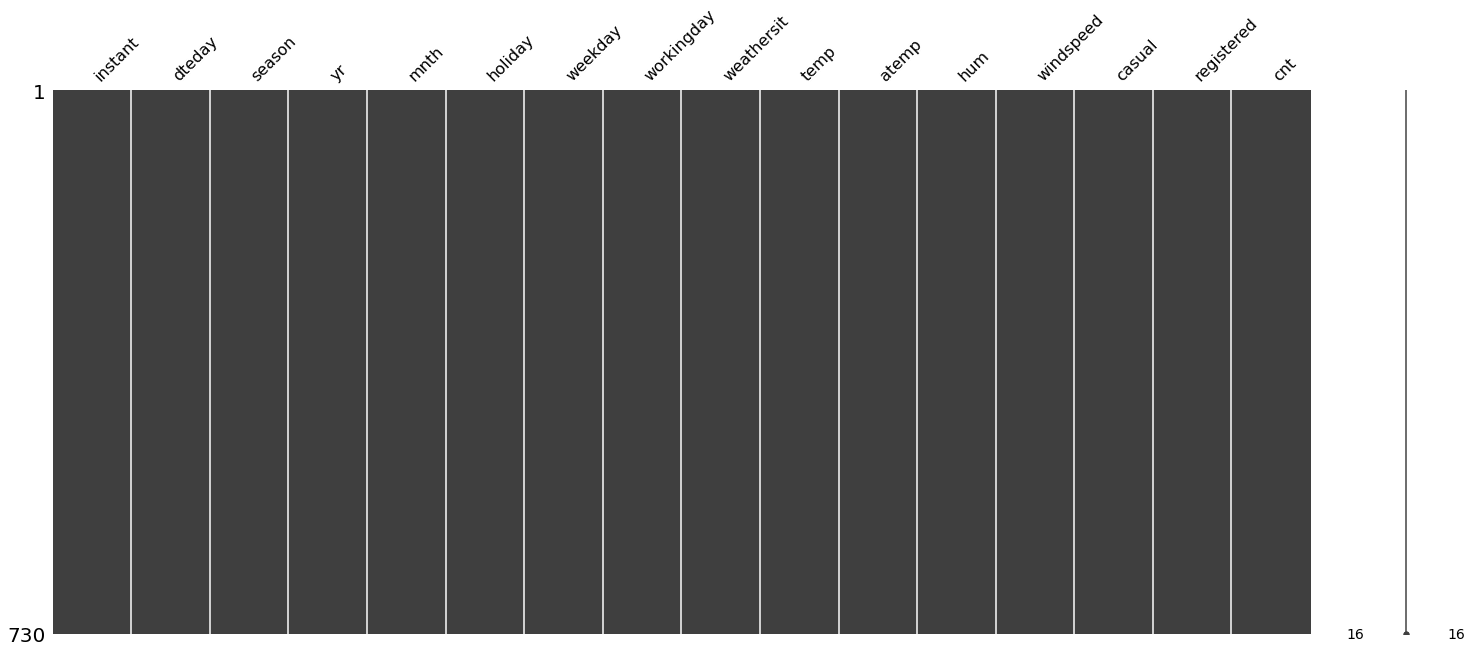

In [8]:
null_day_df = day_df.isnull().sum()/day_df.shape[0]
print("Percentage of Missing Values: ", null_day_df.to_frame()*100)
mn.matrix(day_df);

**NOTE: no null values in any of the columns.**

# 4. Clean data

In [9]:
# Drop "instant" column because it is index column which has nothing meanings
day_df.drop(['instant'], axis = 1, inplace = True)

# Dropp "dteday" column because dataset has "month" and "weekday" columns
day_df.drop(['dteday'], axis = 1, inplace = True)

# Drop "casual" and "registered" columns because "cnt" column is sum of 2 columns
day_df.drop(['casual'], axis = 1, inplace = True)
day_df.drop(['registered'], axis = 1, inplace = True)

In [10]:
#data after dropping
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#5. Find outlier

In [11]:
#Print number of unique values in all columns
day_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

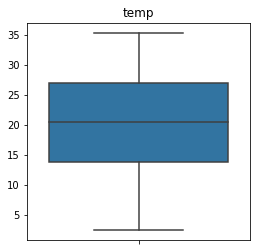

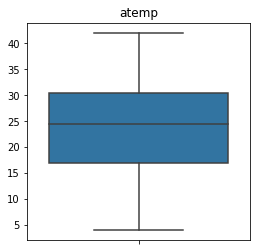

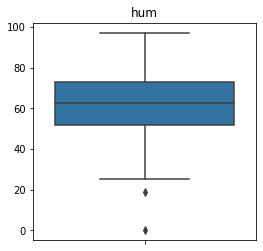

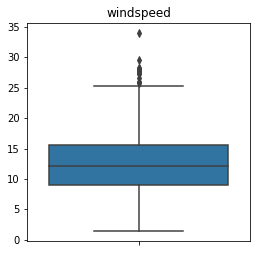

In [12]:
outlier_col = ['temp', 'atemp', 'hum', 'windspeed']
for i in enumerate(outlier_col):
  fig = plt.subplots(figsize=(4, 4))
  sns.boxplot(y=day_df[i[1]])
  plt.title(i[1])
  plt.ylabel("")

**Note: No outliers**

#6. Convert data format

In [13]:
#Mapping "season" column
day_df.season = day_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

#Mapping "month" column
day_df.mnth = day_df.mnth.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'june', 7:'july', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})

#Mapping "weekday" column
day_df.weekday = day_df.weekday.map({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'})

#Mapping "weathersit" column
day_df.weathersit = day_df.weathersit.map({1:'Clear', 2:'Mist & Cloudy', 3:'Light snow & rain', 4:'Heavy rain & snow'})

#Mapping "workingday" column
#day_df.workingday = day_df.workingday.map({1:'non weekend or holiday', 0:'normal day'})

day_df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# 7. Check linear relationship by pair plot

<Figure size 2160x2160 with 0 Axes>

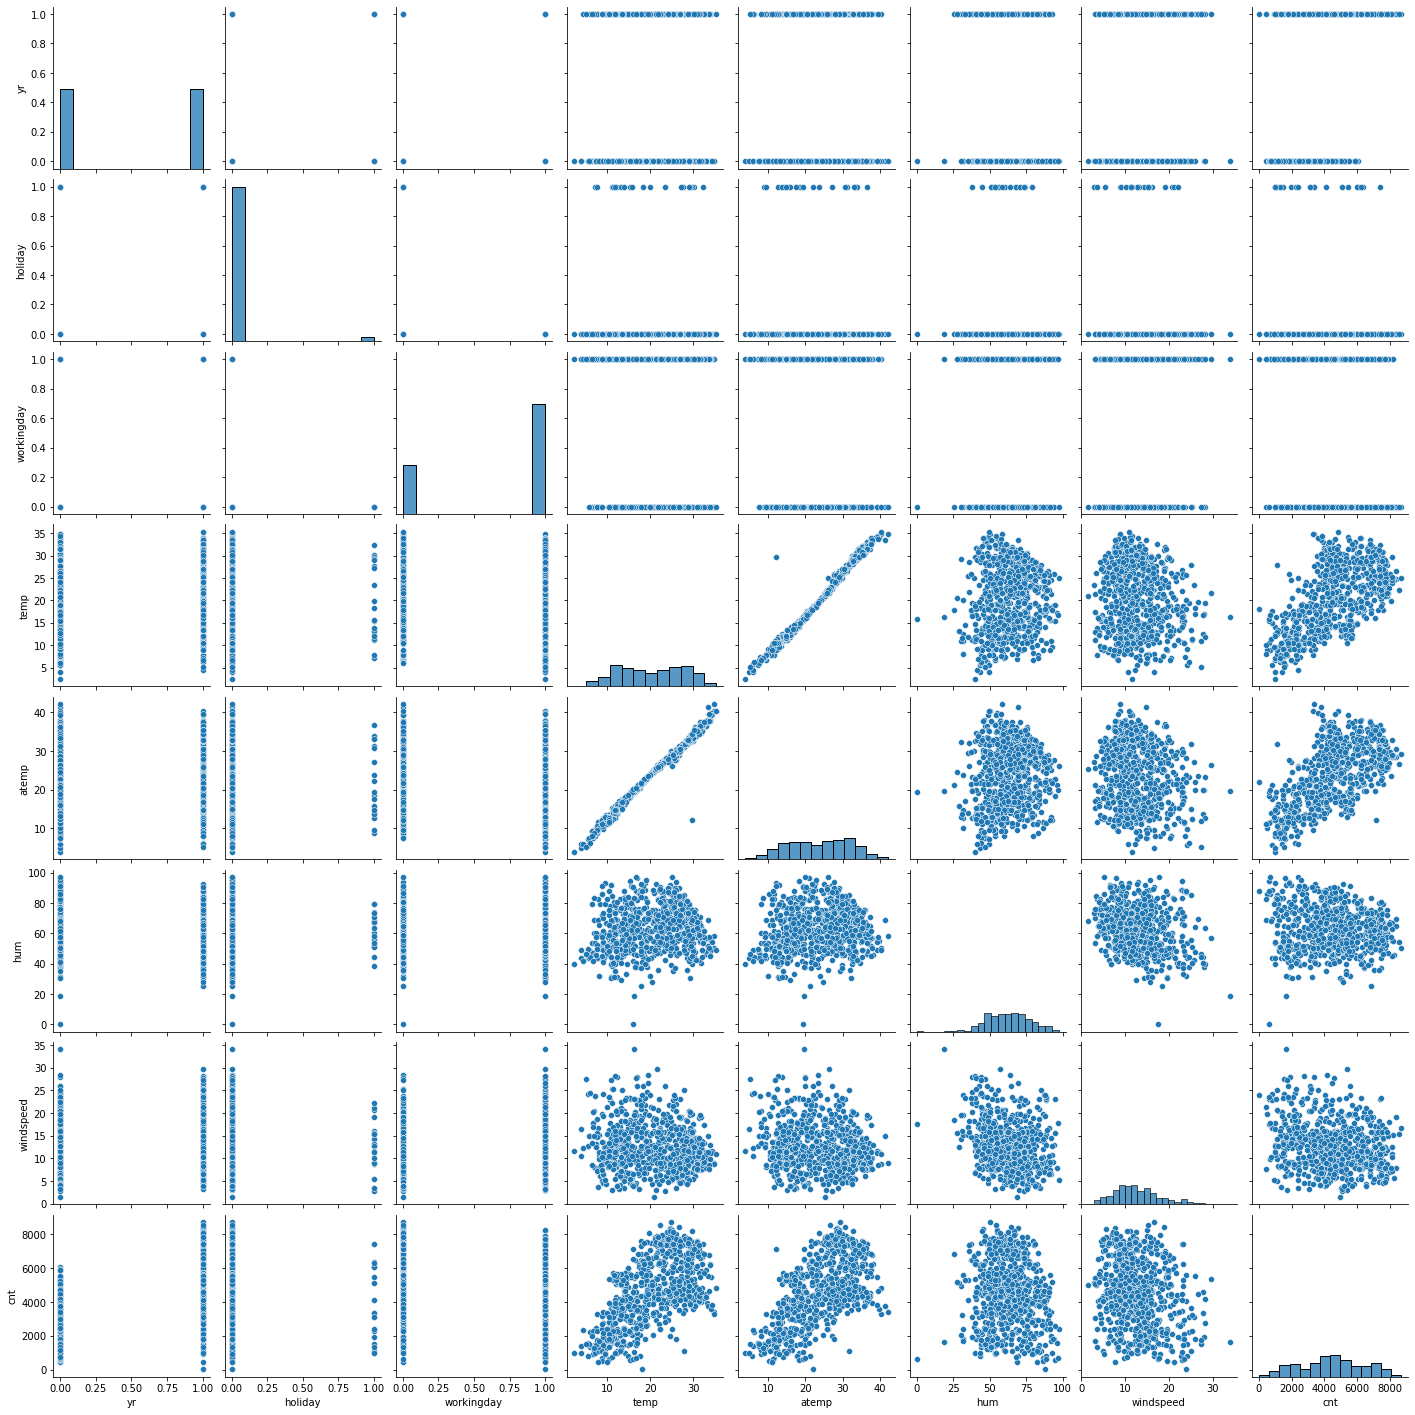

In [14]:
plt.figure(figsize=(30,30))
sns.pairplot(day_df);

<Figure size 2160x2160 with 0 Axes>

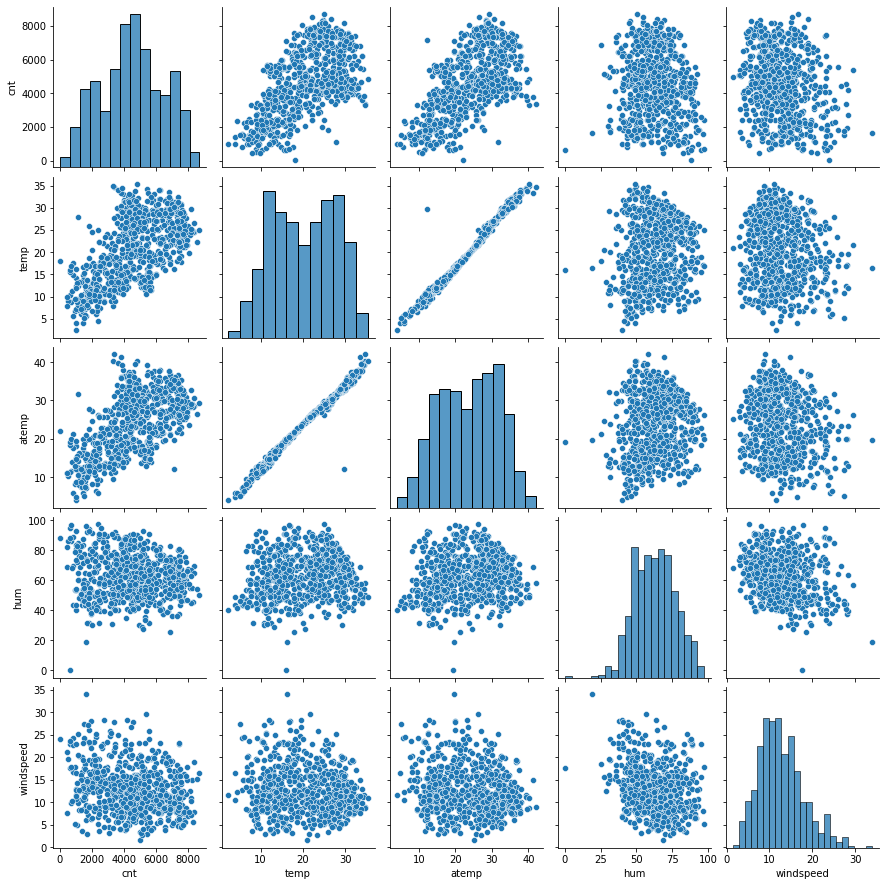

In [15]:
plt.figure(figsize = (30,30))
sns.pairplot(data=day_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

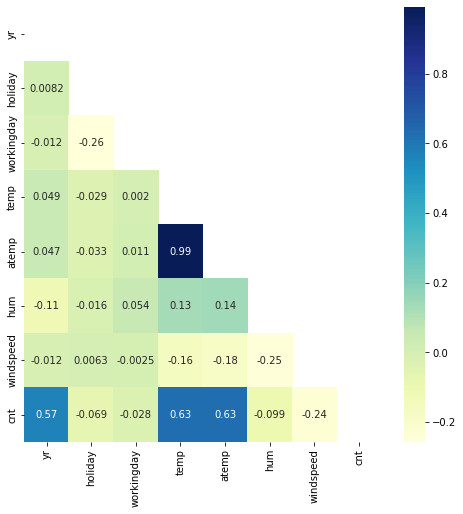

In [16]:
plt.figure(figsize = (8,8))
matrix = np.triu(day_df.corr())
sns.heatmap(day_df.corr(),annot=True, cmap='YlGnBu', mask = matrix);

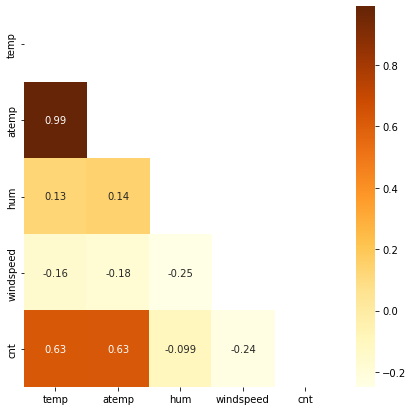

In [17]:
plt.figure(figsize = (7,7))
matrix = np.triu(day_df[['temp','atemp','hum','windspeed','cnt']].corr())
sns.heatmap(day_df[['temp','atemp','hum','windspeed','cnt']].corr(),annot=True, cmap='YlOrBr', mask = matrix);

**Note: temp and atemp has the highest corelation with the target variable.  temp and atemp has correlation almost 1. Target variable has a linear relationship with indeptendent variables**

# 8. Analyse Categorical Variabels with target variable

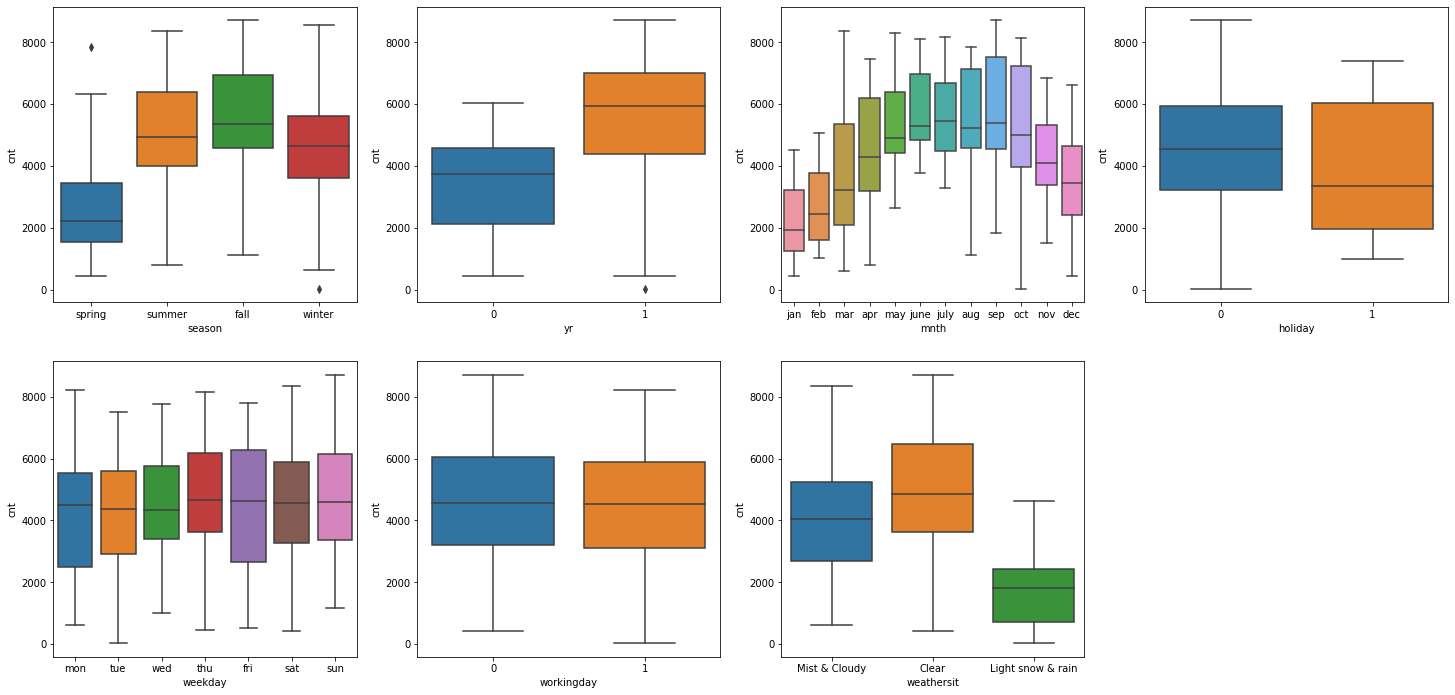

In [18]:
cat_vars = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(25, 25))
for c_v in enumerate(cat_vars):
    plt.subplot(4,4, c_v[0]+1)
    sns.boxplot(data=day_df, x=c_v[1], y='cnt')
plt.show()

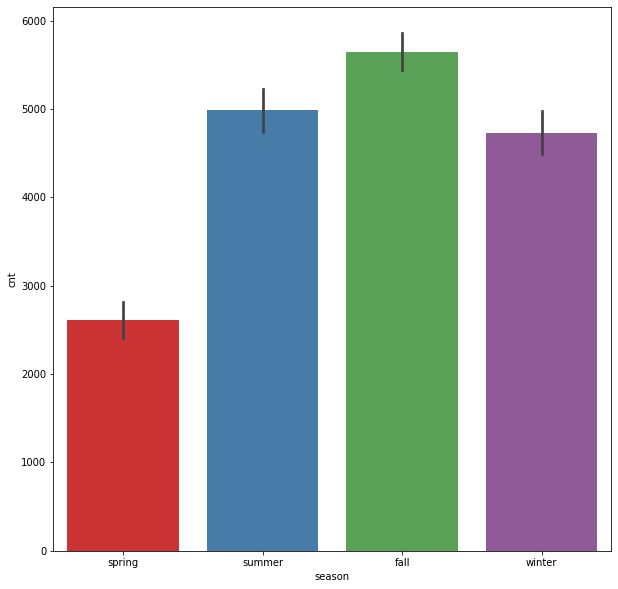

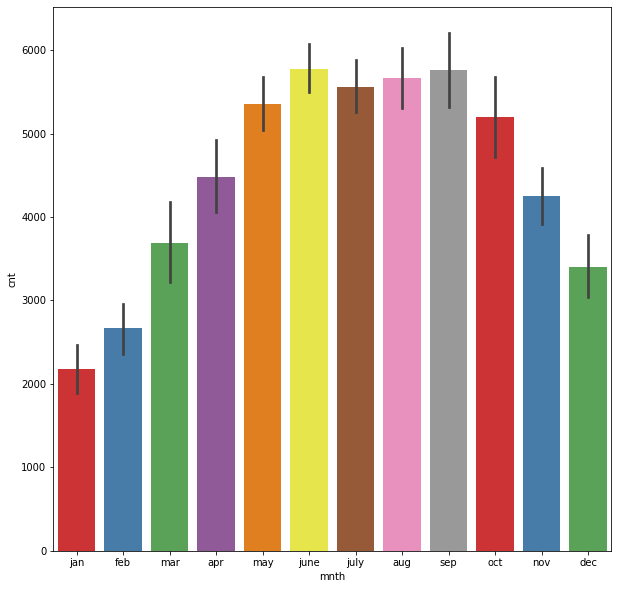

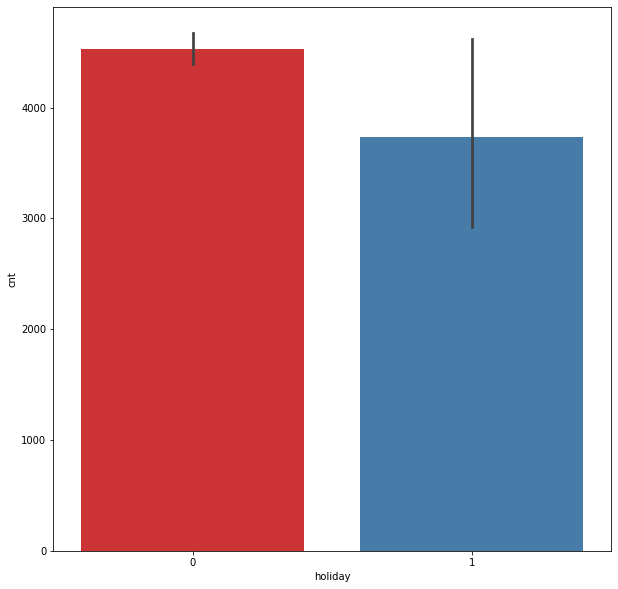

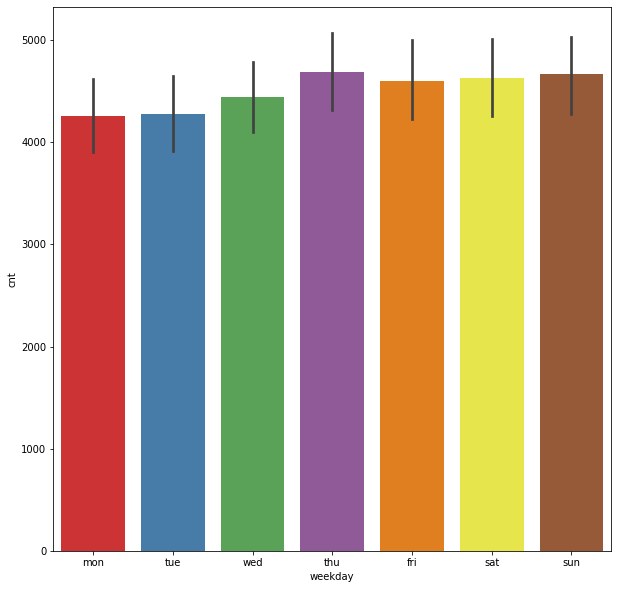

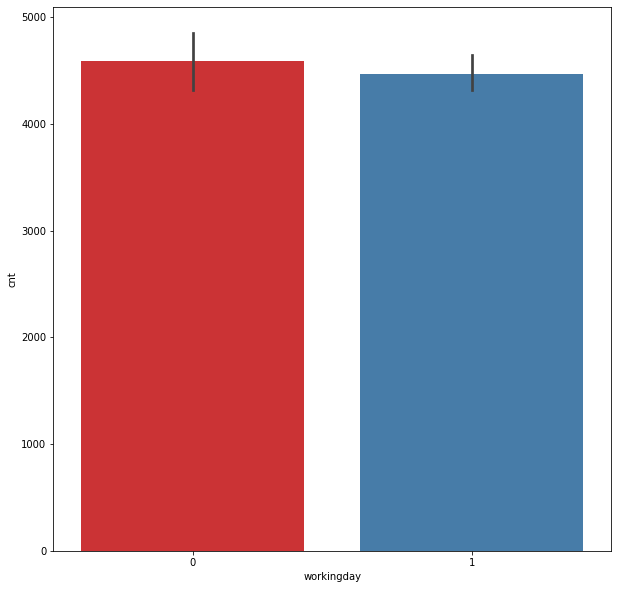

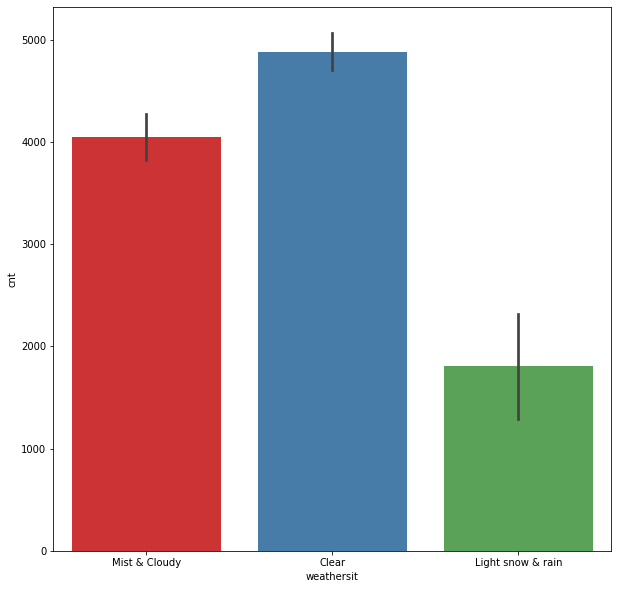

In [19]:
cat_vars = ['season', 'mnth','holiday','weekday','workingday','weathersit']
for c_v1 in enumerate(cat_vars):
  fig = plt.subplots(figsize=(10, 10))
  sns.barplot(x =  c_v1[1], y = 'cnt',data=day_df, palette='Set1')
  plt.show()

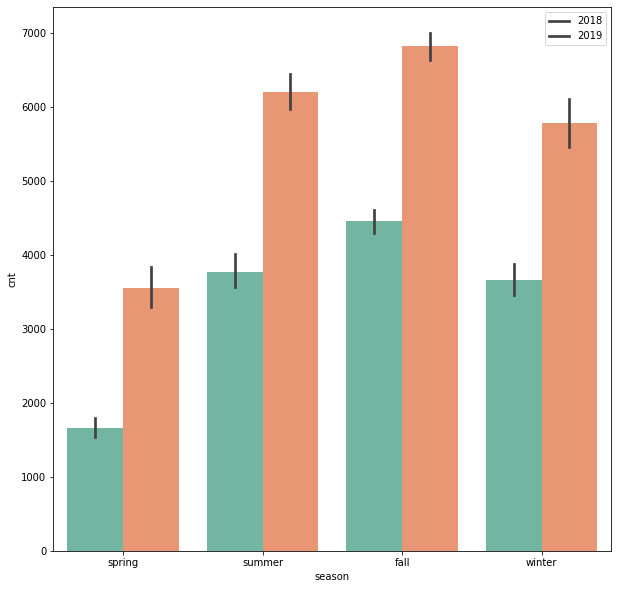

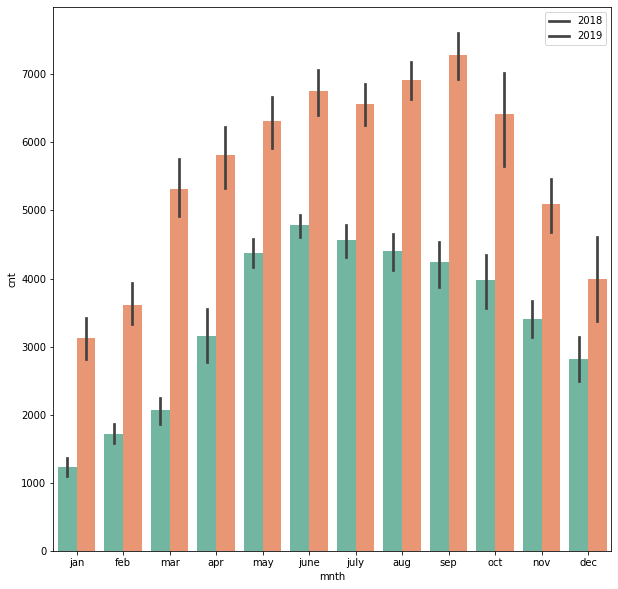

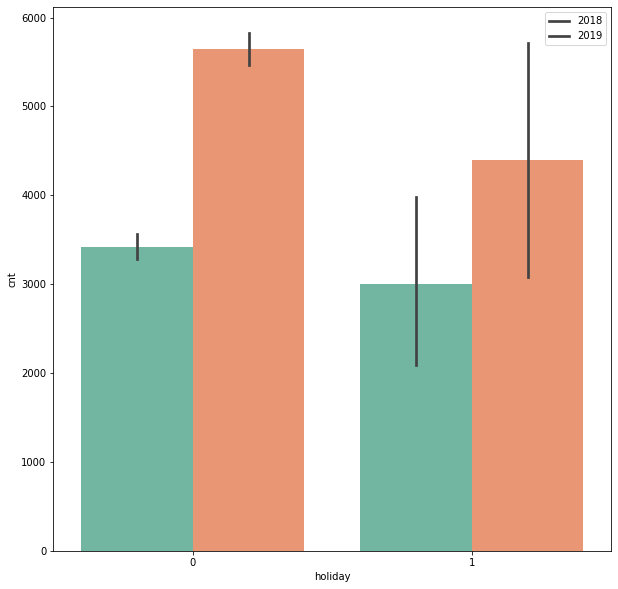

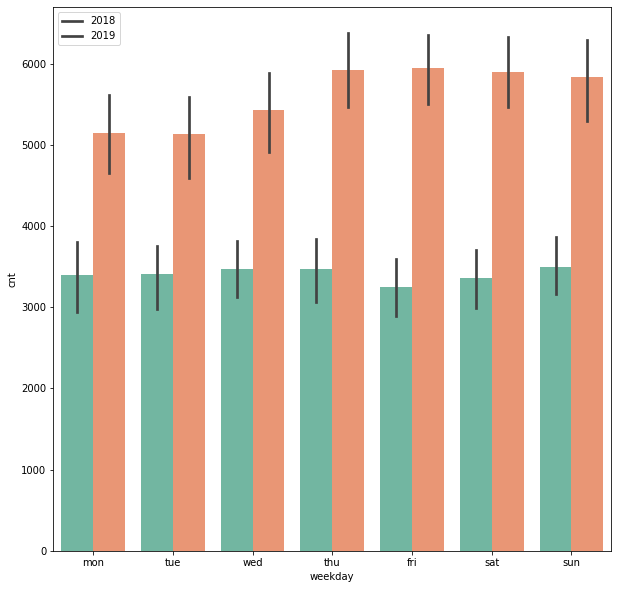

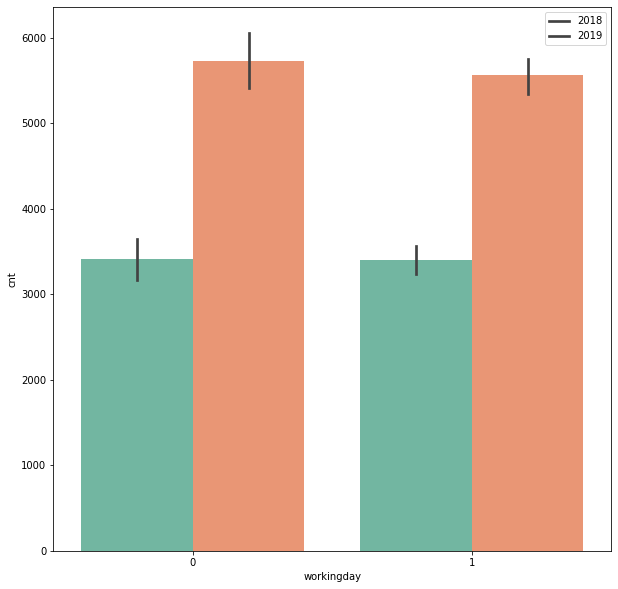

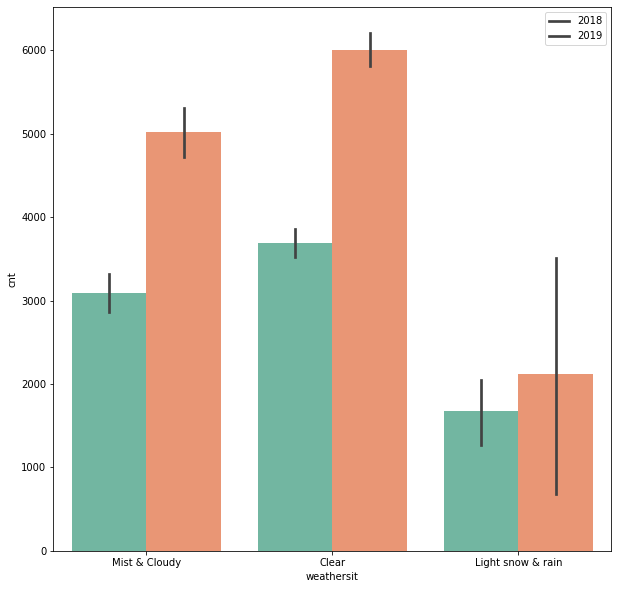

In [20]:
cat_vars = ['season', 'mnth','holiday','weekday','workingday','weathersit']
for c_v2 in enumerate(cat_vars):
  fig = plt.subplots(figsize=(10, 10))
  sns.barplot(x =  c_v2[1], y = 'cnt',data=day_df, hue='yr',palette='Set2')
  plt.legend(labels=['2018', '2019'])
  plt.show()

**Note:**

- Season 3 - fall had the highest rental bikes
- the demand for 2019 had grown
- the number of bike was continuously growing till mid of year and decreasing
- Highest demand on clear weathersit
- The number of bikes booked on working days was quite small compared to holidays.
- The number of bikes booked on holidays was less than on normal days.

# 9. Prepare data for Linear Regression

## 9.1. Create dummy variables

In [21]:
# Dummy variable creation for month, weekday, weathersit and season variables.
day_df = pd.get_dummies(data=day_df,columns=["season","mnth","weekday"],drop_first=True)
day_df = pd.get_dummies(data=day_df,columns=["weathersit"])
day_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light snow & rain,weathersit_Mist & Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


## 9.2. Split Data into x and y

In [22]:
day_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Clear',
       'weathersit_Light snow & rain', 'weathersit_Mist & Cloudy'],
      dtype='object')

In [23]:
day_df.shape

(730, 31)

In [24]:
x = day_df
y = day_df.pop('cnt')

x_train, x_valid, y_train, y_valid = train_test_split(x,y, train_size =0.7, random_state=42) 

In [25]:
x.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light snow & rain,weathersit_Mist & Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
# Checking shape and size for train and valid
print(x_train.shape)
print(x_valid.shape)

(510, 30)
(220, 30)


## 9.3. Scale continuous variables

In [27]:
scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed']
x_train[num_vars] = scaler.fit_transform(x_train[num_vars])

In [28]:
x_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light snow & rain,weathersit_Mist & Cloudy
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,1,...,0,0,0,0,0,1,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0,1,0,...,0,0,0,0,0,0,1,1,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,1,0,0,...,0,0,0,0,1,0,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,1,...,0,0,0,0,1,0,0,0,0,1
625,1,0,1,0.703024,0.637937,0.899098,0.839562,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [29]:
x_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light snow & rain,weathersit_Mist & Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.519608,0.027451,0.698039,0.551313,0.526919,0.654203,0.415045,0.231373,0.258824,0.24902,...,0.090196,0.149020,0.143137,0.133333,0.135294,0.156863,0.133333,0.625490,0.029412,0.345098
std,0.500106,0.163554,0.459559,0.227237,0.212992,0.143788,0.185760,0.422124,0.438419,0.43287,...,0.286744,0.356457,0.350557,0.340268,0.342373,0.364028,0.340268,0.484471,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354526,0.354454,0.544033,0.281934,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575824,0.564951,0.660798,0.384737,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745338,0.698389,0.756977,0.526489,0.000000,1.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


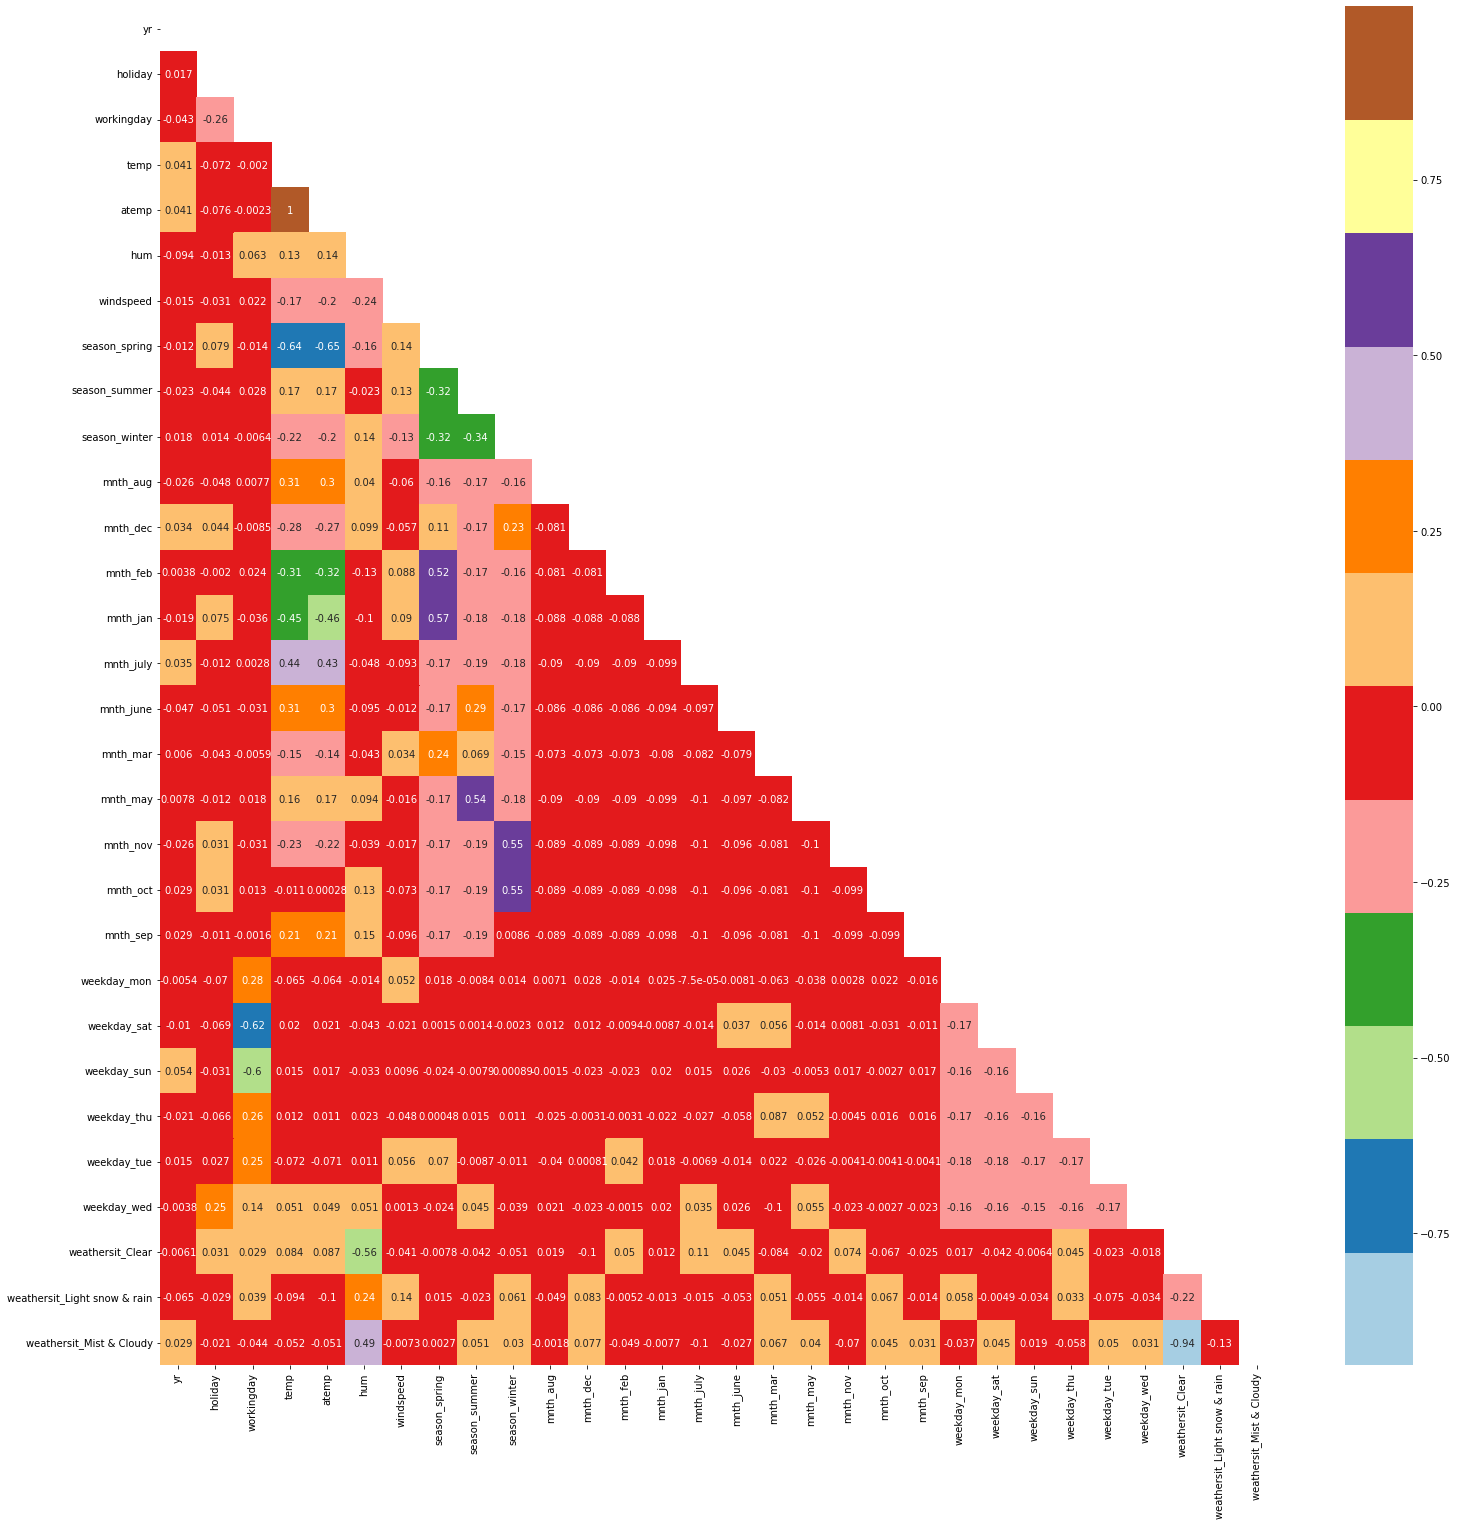

In [30]:
#check the correlation to find which variables are highly correlated
plt.figure(figsize = (25,25))
matrix = np.triu(x_train.corr())
sns.heatmap(x_train.corr(), annot = True, cmap="Paired", mask = matrix);

## 9.4  Build a Model by RFE

In [31]:
# Running RFE
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm, step = 15)           
rfe = rfe.fit(x_train, y_train)

In [32]:
#top 15 columns selected by RFE
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 2),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('mnth_aug', False, 2),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', False, 2),
 ('mnth_july', True, 1),
 ('mnth_june', False, 2),
 ('mnth_mar', False, 2),
 ('mnth_may', False, 2),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 2),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 2),
 ('weekday_sat', False, 2),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 2),
 ('weekday_tue', False, 2),
 ('weekday_wed', False, 2),
 ('weathersit_Clear', True, 1),
 ('weathersit_Light snow & rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1)]

# 10. Build multiple linear models

In [33]:
cols = x_train.columns[rfe.support_]
print(cols)

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_july', 'mnth_nov', 'mnth_sep',
       'weekday_sun', 'weathersit_Clear', 'weathersit_Light snow & rain',
       'weathersit_Mist & Cloudy'],
      dtype='object')


In [34]:
# checking which columns has been rejected
x_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'season_summer', 'mnth_aug', 'mnth_feb',
       'mnth_jan', 'mnth_june', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'weekday_mon', 'weekday_sat', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

### 10.4.1 Model 1

In [35]:
# Creating x_train dataframe with RFE selected variables
x_train_rfe = x_train[cols]

In [36]:
#calculate VIF of variables
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,173.34
1,temp,172.48
12,weathersit_Clear,47.64
14,weathersit_Mist & Cloudy,32.80
13,weathersit_Light snow & rain,4.28
5,season_spring,2.86
6,season_winter,2.19
3,hum,1.89
9,mnth_nov,1.71
8,mnth_july,1.36


In [37]:
x_train1 = sm.add_constant(x_train_rfe)
lr1 = sm.OLS(y_train,x_train1).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.1
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          2.08e-184
Time:                        13:33:26   Log-Likelihood:                -4122.0
No. Observations:                 510   AIC:                             8274.
Df Residuals:                     495   BIC:                             8338.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### 10.4.2 Model 2

In [38]:
#remove weekday_sun because of its high P value 
x_train_new = x_train_rfe.drop(["weekday_sun"], axis = 1)

# Check for the VIF values of the feature variables 
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,173.18
1,temp,172.31
11,weathersit_Clear,47.46
13,weathersit_Mist & Cloudy,32.67
12,weathersit_Light snow & rain,4.27
5,season_spring,2.86
6,season_winter,2.19
3,hum,1.89
9,mnth_nov,1.71
8,mnth_july,1.36


In [39]:
x_train2 = sm.add_constant(x_train_new)
lr2 = sm.OLS(y_train,x_train2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     194.0
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          6.37e-185
Time:                        13:33:27   Log-Likelihood:                -4123.5
No. Observations:                 510   AIC:                             8275.
Df Residuals:                     496   BIC:                             8334.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### 10.4.3 Model 3

In [40]:
# Removing the variable 'atemp' based on its high p value and vif, not removing 'temp' because temperature is an important factor
x_train_new = x_train_new.drop(['atemp'], axis = 1)

# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,weathersit_Clear,46.59
12,weathersit_Mist & Cloudy,32.34
11,weathersit_Light snow & rain,4.27
1,temp,3.52
4,season_spring,2.84
5,season_winter,2.18
2,hum,1.87
8,mnth_nov,1.71
7,mnth_july,1.36
6,mnth_dec,1.27


In [41]:
x_train3 = sm.add_constant(x_train_new)
lr3 = sm.OLS(y_train,x_train3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.7
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          2.85e-185
Time:                        13:33:27   Log-Likelihood:                -4125.5
No. Observations:                 510   AIC:                             8277.
Df Residuals:                     497   BIC:                             8332.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### 10.4.4. Model 4

In [42]:
#Removing the variable 'hum' even though the VIF of 'hum' is not the highest. 'hum' has highest negative coefficient
x_train_new = x_train_new.drop(["hum"], axis = 1)

# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,weathersit_Clear,27.35
11,weathersit_Mist & Cloudy,15.13
1,temp,3.42
3,season_spring,2.84
10,weathersit_Light snow & rain,2.24
4,season_winter,2.16
7,mnth_nov,1.71
6,mnth_july,1.35
5,mnth_dec,1.27
8,mnth_sep,1.12


In [43]:
x_train4 = sm.add_constant(x_train_new)
lr4 = sm.OLS(y_train,x_train4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.2
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          7.38e-183
Time:                        13:33:27   Log-Likelihood:                -4134.0
No. Observations:                 510   AIC:                             8292.
Df Residuals:                     498   BIC:                             8343.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### 10.4.5. Model 5

In [44]:
## Dropping the variable mnth_july as it has negative coefficient and has high p-value
x_train_new = x_train_new.drop(["mnth_july"], axis = 1)

# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,weathersit_Clear,26.39
10,weathersit_Mist & Cloudy,14.46
1,temp,2.94
3,season_spring,2.80
9,weathersit_Light snow & rain,2.21
4,season_winter,2.16
6,mnth_nov,1.70
5,mnth_dec,1.26
2,windspeed,1.10
7,mnth_sep,1.07


In [45]:
x_train5 = sm.add_constant(x_train_new)
lr5 = sm.OLS(y_train,x_train5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     235.3
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          9.84e-182
Time:                        13:33:27   Log-Likelihood:                -4139.5
No. Observations:                 510   AIC:                             8301.
Df Residuals:                     499   BIC:                             8348.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### 10.4.6. Model 6

In [46]:
## Dropping the variable mnth_sep as it has high p-value
x_train_new = x_train_new.drop(["mnth_sep"], axis = 1)

# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,weathersit_Clear,26.38
9,weathersit_Mist & Cloudy,14.45
1,temp,2.92
3,season_spring,2.79
8,weathersit_Light snow & rain,2.21
4,season_winter,2.14
6,mnth_nov,1.68
5,mnth_dec,1.25
2,windspeed,1.10
0,yr,1.01


In [47]:
x_train6 = sm.add_constant(x_train_new)
lr6 = sm.OLS(y_train,x_train6).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     254.5
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          2.24e-180
Time:                        13:33:27   Log-Likelihood:                -4145.6
No. Observations:                 510   AIC:                             8311.
Df Residuals:                     500   BIC:                             8354.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Note: F-Statistics value of 254.5 (which is greater than 1) and the p-value of 2.24e-180 almost equals to 0, states that the overall model is significant**

# 11. Residucal Analysis

In [48]:
x_train6

,const,yr,temp,windspeed,season_spring,season_winter,mnth_dec,mnth_nov,weathersit_Clear,weathersit_Light snow & rain,weathersit_Mist & Cloudy
645,1.0,1,0.403972,0.419004,0,1,0,0,0,0,1
163,1.0,0,0.717562,0.708724,0,0,0,0,1,0,0
360,1.0,0,0.331287,0.415925,1,0,1,0,0,0,1
640,1.0,1,0.745598,0.110593,0,1,0,0,0,0,1
625,1.0,1,0.703024,0.839562,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
71,1.0,0,0.405237,0.621696,1,0,0,0,1,0,0
106,1.0,0,0.495350,0.704080,0,0,0,0,1,0,0
270,1.0,0,0.717562,0.316186,0,1,0,0,0,0,1
435,1.0,1,0.507811,0.464173,1,0,0,0,1,0,0


In [49]:
x_train6.columns

Index(['const', 'yr', 'temp', 'windspeed', 'season_spring', 'season_winter',
       'mnth_dec', 'mnth_nov', 'weathersit_Clear',
       'weathersit_Light snow & rain', 'weathersit_Mist & Cloudy'],
      dtype='object')

## 11.1 Error terms

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

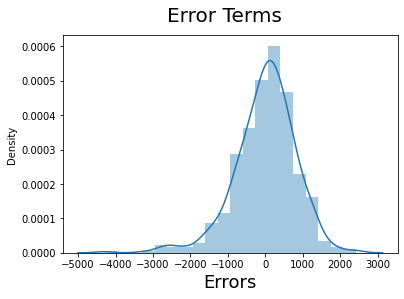

In [50]:
y_train_predict = lr6.predict(x_train6)
fig = plt.figure()
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

## 11.2. Linearity

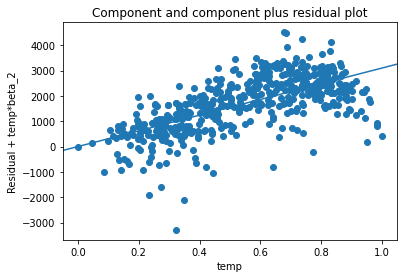

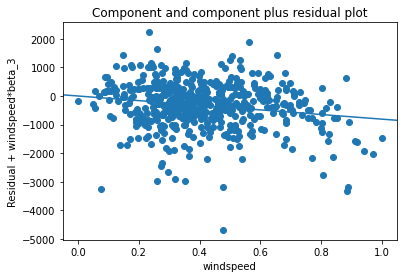

In [51]:
sm.graphics.plot_ccpr(lr6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr6, 'windspeed')
plt.show()

## 11.3. Homoscedasticity

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


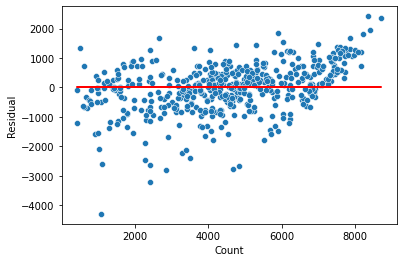

In [52]:
y_train_pred = lr6.predict(x_train6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

**Note: the Residuals are normally distributed**

## 11.4.Independence of residuals
Durbin-Watson value of model 6 is 2.036, which signifies there is no autocorrelation.

## 11.5 Multi Colinearity

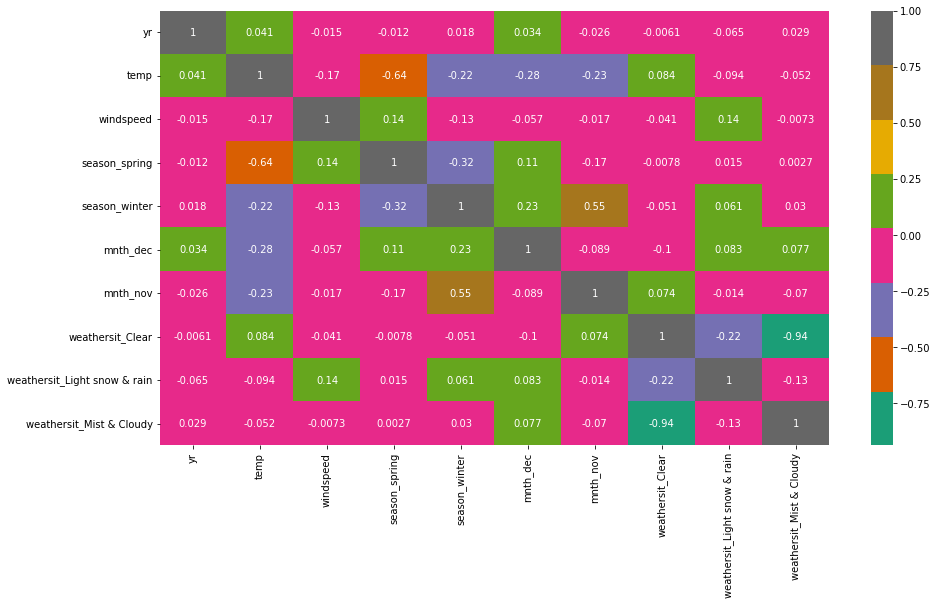

In [53]:
plt.figure(figsize=(15,8))
sns.heatmap(x_train_new.corr(),annot = True, cmap="Dark2")
plt.show()

**Note: there is no Multicollinearity from the heatmap.**

# 12. Make Predictions Using the Final Model

In [54]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed']
x_valid[num_vars] = scaler.transform(x_valid[num_vars])
x_valid.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light snow & rain,weathersit_Mist & Cloudy
468,1,0,0,0.543115,0.536771,0.518248,0.422104,0,1,0,...,0,0,0,1,0,0,0,1,0,0
148,0,0,1,0.758058,0.704203,0.843709,0.479765,0,1,0,...,0,0,0,0,0,1,0,1,0,0
302,0,0,1,0.324018,0.317998,0.642765,0.386287,0,0,1,...,0,0,0,0,0,1,0,1,0,0
355,0,0,0,0.453814,0.455552,0.780592,0.062325,1,0,0,...,0,0,1,0,0,0,0,0,0,1
515,1,0,1,0.773634,0.724915,0.507943,0.433030,0,1,0,...,0,0,0,0,0,0,0,1,0,0


## R-Squared value

In [55]:
x_valid = x_valid[['yr', 'temp', 'windspeed', 'season_spring', 'season_winter',
       'mnth_dec', 'mnth_nov', 'weathersit_Clear',
       'weathersit_Light snow & rain', 'weathersit_Mist & Cloudy']]
x_valid_lm_6 = sm.add_constant(x_valid)
y_pred = lr6.predict(x_valid_lm_6)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [56]:
r2 = r2_score(y_valid, y_pred)
r2

0.8100702609032326

In [57]:
# Adjusted R-squared 
adjusted_r2 = 1-(1-r2)*(x_valid.shape[0]-1)/(x_valid.shape[0]-x_valid.shape[1]-1)
adjusted_r2

0.8009827135780285

Comparision between Training and Testing dataset:
- Train dataset R2:  0.821
- Train adjust R2: 0.818
- Test dataset R2: 0.81
- Test dataset Adjusted R2: 0.8

In [58]:
lr6.params

const                           1299.190467
yr                              2003.039315
temp                            3105.357973
windspeed                       -810.344339
season_spring                  -1386.300092
season_winter                    739.885160
mnth_dec                        -687.279002
mnth_nov                        -826.598103
weathersit_Clear                1389.486372
weathersit_Light snow & rain    -823.107832
weathersit_Mist & Cloudy         732.811928
dtype: float64

# 13. Model Evalution

Text(0, 0.5, 'y_valid')

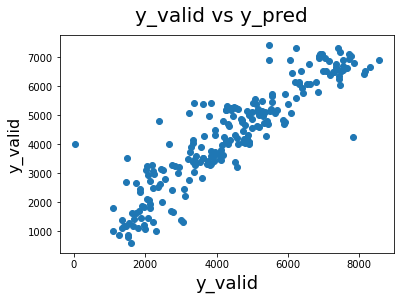

In [59]:
# Plotting y_valid and y_pred

fig = plt.figure()
plt.scatter(y_valid, y_pred)
fig.suptitle('y_valid vs y_pred', fontsize = 20) 
plt.xlabel('y_valid', fontsize = 18)
plt.ylabel('y_valid', fontsize = 16) 

In [60]:
#Plot Actual vs Predicted for Test Data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(20,5))
    plt.plot(c,act, color="green", linewidth=2.5, linestyle="--")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)             

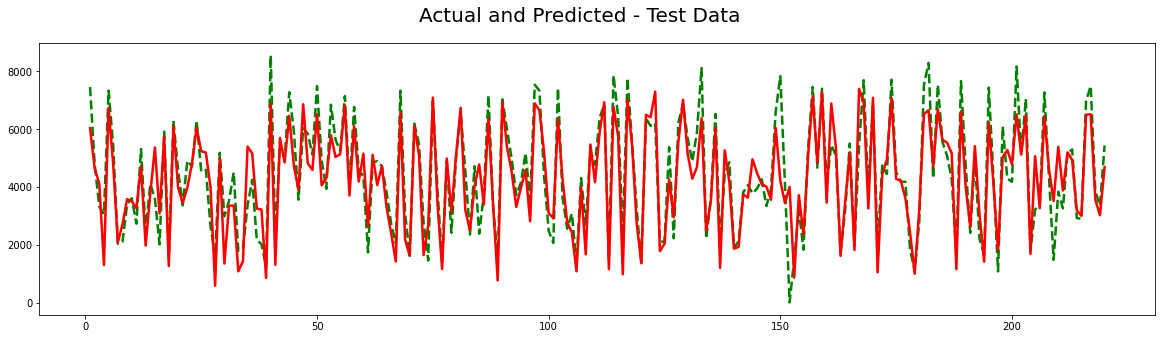

In [61]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_valid,y_pred,len(y_valid)+1,'Test Data')

# Conclusion

- Significant variables to predict the demand for shared bikes: 'year', 'temp', 'windspeed', 'season_spring', 'season_winter', mnth_dec', 'mnth_nov', 'weathersit_Clear', 'weathersit_Light snow & rain', 'weathersit_Mist & Cloudy'
- The business should develop business in the spring when the weather is clear and also do some promotion on September